In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Experimenting impermanent loss when providing liquidity to an AMM Assets

### Suppose one asset is stablecoin, e,g., USDC, USDT, DAI

In [3]:
# price at time t=0
eth0 = 100
dai0 = 1
# quantity at time 0
qty0_eth = 10
qty0_dai = 1000

# AMM: x*y=k
k = qty0_eth * qty0_dai

total0_asset = eth0 * qty0_eth + dai0 * qty0_dai

In [4]:
k, total0_asset

(10000, 2000)

Let's suppose the price of ETH increases to $110 in the external market, creating an arbitrage opportunity. DAI is stablecoin, so its price does not change.
Price increase in ETH incentivizes those arbitrageurs to sell DAI for ETH in the pool, so that they can sell ETH for a higher price in the external market.

eth1 * qty1_eth = dai1 * qty1_dai
<br>
qty1_eth * qty1_dai = k ---> qty1_eth = k / qty1_dai
<br>
which results in:
<br>
qty1_dai = (eth1 * qty1_eth) / dai1 = (eth1 * k / qty1_dai) / dai1 = (eth1 * k)/(dai1 * qty1_dai1)
<bt>
----> dai1 * (qty1_dai1)**2 = eth1 * k ---> qty1_dai1 = sqrt(eth1 * k / dai1)

In [5]:
eth1 = 500
dai1 = 1

# An arbitrageue comes along and wants to swap some dai for eth until both sides of the AMM are equal
qty1_dai = np.sqrt(eth1 * k / dai1)
qty_swap_from = qty1_dai - qty0_dai
qty1_eth = k / qty1_dai

In [6]:
(eth1, qty1_eth), (dai1, qty1_dai)

((500, 4.47213595499958), (1, 2236.06797749979))

In [7]:
qty1_eth * eth1 == qty1_dai * dai1

True

In [8]:
qty_swap_to = qty0_eth - qty1_eth
qty_swap_to

5.52786404500042

### After swapping DAI for ETH

In [9]:
total1_asset = qty1_eth * eth1 + qty1_dai * dai1
total1_asset

4472.13595499958

### When hold the assets

In [10]:
total_asset_hold = eth1 * qty0_eth + dai1 * qty0_dai
total_asset_hold

6000

### Impermanent Loss Because of AMM

In [11]:
impermanent_loss = total_asset_hold - total1_asset
impermanent_loss, impermanent_loss / total_asset_hold

(1527.8640450004204, 0.2546440075000701)

In [12]:
### Impermanent Loss from ETH Price Changes

In [13]:
token0_prices = np.arange(1, 1001)

In [14]:
# Token1 = stablecoin
def amm_loss(price0_token0, qty0_token0, k, price1_token0):
    qty0_token1 = k / qty0_token0
    qty1_token1 = np.sqrt(price1_token0 * k / 1)
    qty_swap_from = qty1_token1 - qty0_token1
    
    qty1_token0 = k / qty1_token1
    qty_swap_to = qty0_token0 - qty1_token0
    
    total_asset_amm = price1_token0 * qty1_token0 + 1 * qty1_token1
    total_asset_holding = price1_token0 * qty0_token0 + 1 * qty0_token1
    
    loss = (total_asset_holding - total_asset_amm) / total_asset_holding
    return loss
    

In [15]:
amm_loss(100, 10, 10000, 50) * 100

5.71909584179366

In [16]:
amm_loss_percentage = np.array([amm_loss(100, 10, 10000, i) for i in token0_prices]) * 100

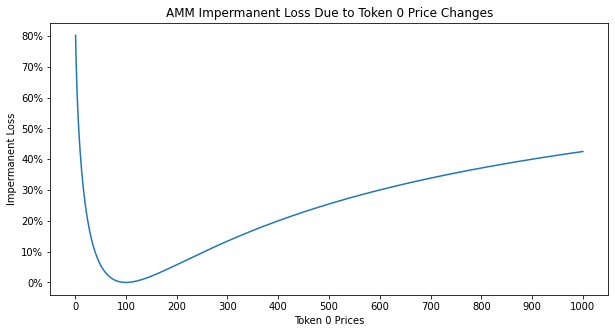

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(token0_prices, amm_loss_percentage)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Token 0 Prices")
plt.ylabel("Impermanent Loss")
plt.xticks(np.arange(0, 1001, step=100))

plt.title("AMM Impermanent Loss Due to Token 0 Price Changes")
plt.show()